## Find $I_s$

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Load the CSV file
# data = pd.read_csv("Dark18_2.csv", delim_whitespace=True)
# data = pd.read_csv("Dark20_2.csv", delim_whitespace=True)
data = pd.read_csv("Dark22_2.csv", delim_whitespace=True)
data[['VOLT1', 'CURR1']] = data['VOLT1'].str.split(',', expand=True)

# Drop the unnecessary column
data = data.drop(',CURR1', axis=1)

# Convert columns to float type
data['VOLT1'] = data['VOLT1'].astype(float)
data['CURR1'] = data['CURR1'].astype(float)

data.head()
# data.tail()

,VOLT1,CURR1
0,-1.99,-0.000070
1,-1.99,-0.000065
2,-1.98,-0.000065
3,-1.97,-0.000065
4,-1.96,-0.000065


In [50]:
# extract voltage and current correctly
V = data['VOLT1']
I = data['CURR1']
print(V)
print(I)

0     -1.99
1     -1.99
2     -1.98
3     -1.97
4     -1.96
       ... 
296    0.79
297    0.79
298    0.79
299    0.79
300    0.79
Name: VOLT1, Length: 301, dtype: float64
0     -0.000070
1     -0.000065
2     -0.000065
3     -0.000065
4     -0.000065
         ...   
296    0.330000
297    0.330000
298    0.330000
299    0.330000
300    0.330000
Name: CURR1, Length: 301, dtype: float64


In [51]:
forward_bias_data = data[V > 0]
print(forward_bias_data)

       VOLT1         CURR1
201  0.00632  3.510000e-07
202  0.01640  1.410000e-06
203  0.02670  2.300000e-06
204  0.03690  1.640000e-06
205  0.04740  3.540000e-06
..       ...           ...
296  0.79000  3.300000e-01
297  0.79000  3.300000e-01
298  0.79000  3.300000e-01
299  0.79000  3.300000e-01
300  0.79000  3.300000e-01

[100 rows x 2 columns]


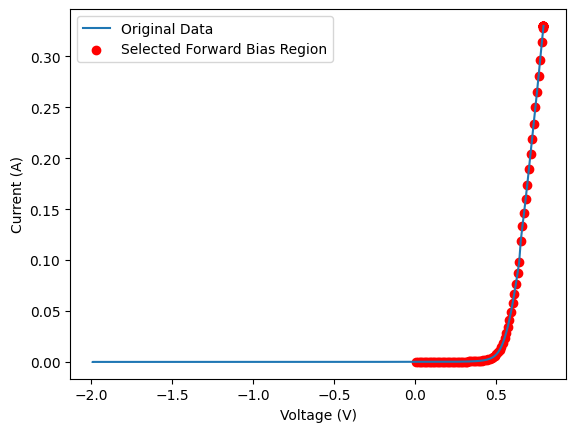

In [52]:
# Plot the I-V curve to visualize
plt.plot(V, I, label="Original Data")
plt.scatter(forward_bias_data['VOLT1'], forward_bias_data['CURR1'], color='red', label="Selected Forward Bias Region")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()
plt.show()

In [53]:
# Get reverse bias data (where voltage < 0)
reverse_bias_data = data[data['VOLT1'] < 0]
print(reverse_bias_data)



       VOLT1         CURR1
0   -1.99000 -7.020000e-05
1   -1.99000 -6.510000e-05
2   -1.98000 -6.540000e-05
3   -1.97000 -6.470000e-05
4   -1.96000 -6.460000e-05
..       ...           ...
196 -0.04360 -1.640000e-06
197 -0.03420 -2.140000e-06
198 -0.02400 -1.820000e-06
199 -0.01370 -2.070000e-07
200 -0.00407 -5.500000e-07

[201 rows x 2 columns]


Reverse saturation current (I₀) = -4.91e-05 A


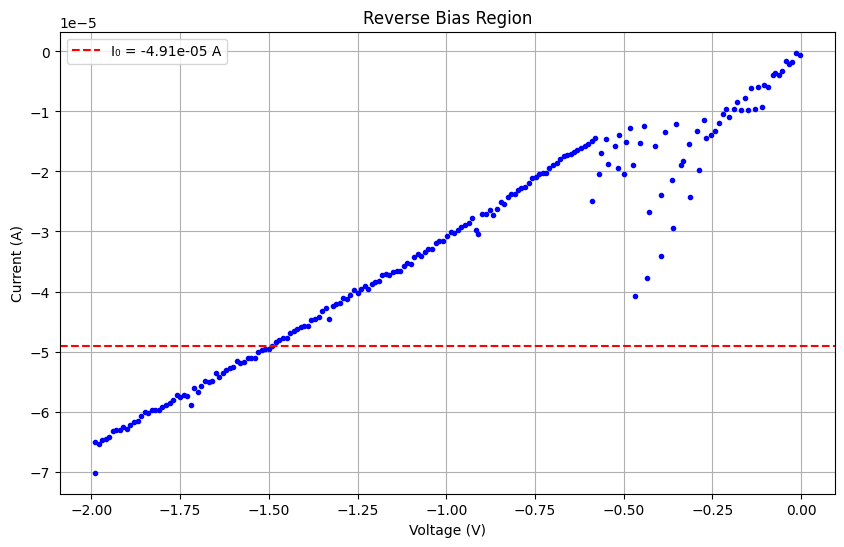

In [54]:
# Calculate the average current in the reverse bias region
# It's better to use values where the current has saturated
I_0 = reverse_bias_data[reverse_bias_data['VOLT1'] < -1]['CURR1'].mean()

print(f"Reverse saturation current (I₀) = {I_0:.2e} A")

# Let's visualize the reverse bias region
plt.figure(figsize=(10, 6))
plt.plot(reverse_bias_data['VOLT1'], reverse_bias_data['CURR1'], 'b.')
plt.axhline(y=I_0, color='r', linestyle='--', label=f'I₀ = {I_0:.2e} A')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Reverse Bias Region')
plt.grid(True)
plt.legend()
plt.show()

## Find $R_s$

In [29]:
# High forward bias region (e.g., V > 0.6V)
high_bias = V > 0.6
V_high = V[high_bias]
I_high = I[high_bias]

# print(V_high)
# print(I_high)

In [30]:
# Linear fit to high bias region
slope, intercept = np.polyfit(I_high, V_high, 1)
R_s = slope  # Series resistance
print(f"Series Resistance (R_s): {R_s:.2f} Ω")

Series Resistance (R_s): 0.65 Ω


## Find $R_p$

In [34]:
# Low reverse bias region (e.g., V < -0.1V)
reverse_bias = V < -0.1
V_reverse = V[reverse_bias]
I_reverse = I[reverse_bias]

# print(V_reverse)
print(I_reverse)

0     -0.000051
1     -0.000047
2     -0.000048
3     -0.000047
4     -0.000046
         ...   
186   -0.000003
187   -0.000008
188   -0.000002
189   -0.000004
190   -0.000003
Name: CURR1, Length: 191, dtype: float64


In [32]:
# Linear fit to reverse bias region
slope, intercept = np.polyfit(I_reverse, V_reverse, 1)
R_p = 1 / slope  # Parallel resistance (inverse slope)
print(f"Parallel Resistance (R_p): {R_p:.2f} Ω")

Parallel Resistance (R_p): 0.00 Ω


## Find $W_g$

In [76]:
# Calculate W_g for each temperature separately
# Constants
q = 1.602e-19  # Elementary charge in Coulombs
k = 1.380649e-23  # Boltzmann constant in J/K
k_eV = 8.617333262e-5  # Boltzmann constant in eV/K

In [91]:
# For 18°C
T_18 = 273.15 + 18  # Convert to Kelvin
I_s_18 = -3.47e-5
W_g_18 = -k_eV * T_18 * np.log(abs(I_s_18))
print(f"Bandgap Energy at 18°C: {W_g_18:.4f} eV")

Bandgap Energy at 18°C: 0.2576 eV


In [92]:
# For 20°C
T_20 = 273.15 + 20
I_s_20 = -3.84e-5
W_g_20 = -k_eV * T_20 * np.log(abs(I_s_20))
print(f"Bandgap Energy at 20°C: {W_g_20:.4f} eV")

Bandgap Energy at 20°C: 0.2568 eV


In [93]:
# For 22°C
T_22 = 273.15 + 22
I_s_22 = -4.91e-5
W_g_22 = -k_eV * T_22 * np.log(abs(I_s_22))
print(f"Bandgap Energy at 22°C: {W_g_22:.4f} eV")

Bandgap Energy at 22°C: 0.2523 eV


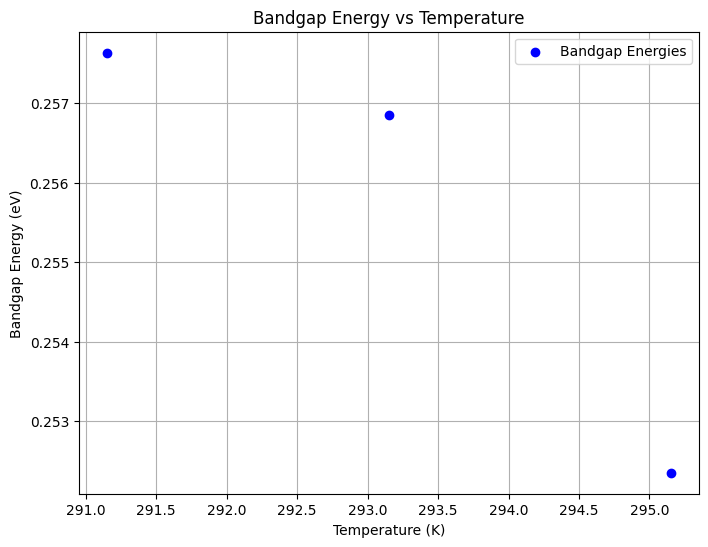

In [90]:
# Optional: Plot the data points
plt.figure(figsize=(8, 6))
temperatures = [T_18, T_20, T_22]
bandgaps = [W_g_18, W_g_20, W_g_22]
plt.scatter(temperatures, bandgaps, color='blue', label='Bandgap Energies')
plt.xlabel('Temperature (K)')
plt.ylabel('Bandgap Energy (eV)')
plt.title('Bandgap Energy vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

## for table IV (light characteristics)

In [2]:
import numpy as np
import pandas as pd

In [28]:
# First, let's look at what we're actually getting
data = pd.read_csv("table_4_data/22100.csv", delim_whitespace=True)
print("First few rows of raw data:")
print(data.head())

# Assuming the values are separated by a comma or another delimiter in the column
# Let's split the column into voltage and current
# If the column name is different, replace 'column_name' with your actual column name
column_name = data.columns[0]  # Gets the name of the first column
data[['voltage', 'current']] = data[column_name].str.split(',', expand=True)

# Convert to numeric values
data['voltage'] = data['voltage'].astype(float)
data['current'] = data['current'].astype(float)

# Now extract as numpy arrays
voltage = data['voltage'].to_numpy()
current = data['current'].to_numpy()

# print("\nAfter separation:")
# print("Voltage:", voltage[:5])  # First 5 values
# print("Current:", current[:5])  # First 5 values

First few rows of raw data:
                 VOLT1  ,CURR1
0  -2.00E+00,-7.12E-02     NaN
1  -1.99E+00,-7.12E-02     NaN
2  -1.98E+00,-7.12E-02     NaN
3  -1.97E+00,-7.12E-02     NaN
4  -1.96E+00,-7.12E-02     NaN


In [63]:
# for table 5
# First, let's look at what we're actually getting
data = pd.read_csv("table_5_data/2075.csv", delim_whitespace=True)
print("First few rows of raw data:")
print(data.head())

# Assuming the values are separated by a comma or another delimiter in the column
# Let's split the column into voltage and current
# If the column name is different, replace 'column_name' with your actual column name
column_name = data.columns[0]  # Gets the name of the first column
data[['voltage', 'current']] = data[column_name].str.split(',', expand=True)


# Convert to numeric values
data['voltage'] = data['voltage'].astype(float)
data['current'] = data['current'].astype(float)

# Now extract as numpy arrays
voltage = data['voltage'].to_numpy()
current = data['current'].to_numpy()

First few rows of raw data:
       Voltage,Current
0  -2.00E+00,-5.33E-02
1  -1.99E+00,-5.46E-02
2  -1.98E+00,-5.46E-02
3  -1.97E+00,-5.06E-02
4  -1.96E+00,-5.26E-02


In [64]:
power = voltage * current
print(power)

[ 1.06600e-01  1.08654e-01  1.08108e-01  9.96820e-02  1.03096e-01
  1.06470e-01  1.05924e-01  1.05378e-01  1.04832e-01  1.04286e-01
  1.03740e-01  1.03194e-01  1.02648e-01  1.02289e-01  1.01742e-01
  1.01195e-01  1.00648e-01  1.00101e-01  9.95540e-02  9.35770e-02
  9.27000e-02  9.14690e-02  9.73660e-02  9.68190e-02  8.62400e-02
  9.53750e-02  9.51780e-02  9.46310e-02  9.40840e-02  9.35370e-02
  9.28200e-02  9.24430e-02  9.17280e-02  9.11820e-02  9.08020e-02
  9.00900e-02  8.28200e-02  8.60640e-02  8.84520e-02  7.96950e-02
  7.84000e-02  8.69730e-02  8.64260e-02  8.58790e-02  8.53320e-02
  8.47850e-02  8.42380e-02  8.35380e-02  7.70640e-02  7.92750e-02
  8.19000e-02  8.13540e-02  8.09560e-02  8.04090e-02  7.98620e-02
  7.91700e-02  7.37280e-02  7.80780e-02  7.51180e-02  7.05000e-02
  7.65800e-02  7.58940e-02  6.85860e-02  7.31580e-02  7.42560e-02
  7.37100e-02  7.31640e-02  6.74310e-02  6.94320e-02  7.15260e-02
  7.09800e-02  7.04340e-02  6.46400e-02  6.68020e-02  6.87960e-02
  6.82500e

In [65]:
# Find maximum Power Point (MPP)
idx_mpp = np.argmax(power)  # Index of max power
U_MPP = voltage[idx_mpp]    # Voltage at MPP
I_MPP = current[idx_mpp]    # Current at MPP
P_MPP = power[idx_mpp]      # Max power

In [66]:
# find Short-Circuit Current (I_SC) and Open-Circuit Voltage (U_OC)
I_SC = current[np.argmax(voltage == 0)]  # Current where voltage is zero
U_OC = voltage[np.argmax(current == 0)]  # Voltage where current is zero

In [67]:
# calculate Fill Factor (FF)
FF = P_MPP / (I_SC * U_OC)

In [68]:
# input power (P_in) and cell area (A)
P_in = 1000  # Example: Light intensity in W/m²
A = 0.002145
efficiency = P_MPP / (P_in * A)

In [69]:
# Print results
print(f"I_MPP: {I_MPP:.4f} A")
print(f"U_MPP: {U_MPP:.4f} V")
print(f"P_MPP: {P_MPP:.4f} W")
print(f"FF: {FF:.4f}")
print(f"Efficiency (η): {efficiency * 100:.2f} %")

I_MPP: 0.3300 A
U_MPP: 0.7940 V
P_MPP: 0.2620 W
FF: 2.4580
Efficiency (η): 12.22 %
